In [1]:
import pandas as pd
import numpy as np
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ericp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("IMDBDataset.csv")

In [3]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df = df.applymap(lambda x: BeautifulSoup(x, "html.parser").get_text())

C:\Users\ericp\AppData\Local\Temp\ipykernel_18168\416029100.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: BeautifulSoup(x, "html.parser").get_text())
C:\Users\ericp\AppData\Local\Temp\ipykernel_18168\416029100.py:1: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df = df.applymap(lambda x: BeautifulSoup(x, "html.parser").get_text())


In [7]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [8]:
df = df.applymap(lambda x:x.lower() if type(x) == str else x)

C:\Users\ericp\AppData\Local\Temp\ipykernel_18168\99616971.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x:x.lower() if type(x) == str else x)


In [9]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


In [10]:
df = df.applymap(lambda x:x.translate(str.maketrans('', '', string.punctuation)))

C:\Users\ericp\AppData\Local\Temp\ipykernel_18168\575861000.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x:x.translate(str.maketrans('', '', string.punctuation)))


In [11]:
stopwords = set(stopwords.words('english'))

df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

In [12]:
lemmatizer = WordNetLemmatizer()

df['review'] = df['review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [13]:
tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split(),max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['review'])

c:\Users\ericp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [14]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [15]:
df = pd.concat([df, tfidf_df], axis=1)

In [16]:
df

,review,sentiment,1,10,2,20,3,30,4,5,...,yes,yet,york,youll,young,younger,youre,youve,zombie,
0,one reviewer mentioned watching 1 oz episode y...,positive,0.096011,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.093160,0.00000,0.0,0.000000,0.0,0.000000,0.0
1,wonderful little production filming technique ...,positive,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0
2,thought wonderful way spend time hot summer we...,positive,0.000000,0.00000,0.140735,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.12387,0.0,0.000000,0.0,0.000000,0.0
3,basically there family little boy jake think t...,negative,0.000000,0.11926,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.123448,0.0,0.172268,0.0
4,petter matteis love time money visually stunni...,positive,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.127881,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,thought movie right good job wasnt creative or...,positive,0.000000,0.00000,0.000000,0.158987,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0
49996,bad plot bad dialogue bad acting idiotic direc...,negative,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0
49997,catholic taught parochial elementary school nu...,negative,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0
49998,im going disagree previous comment side maltin...,negative,0.000000,0.00000,0.000000,0.000000,0.0,0.181423,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0


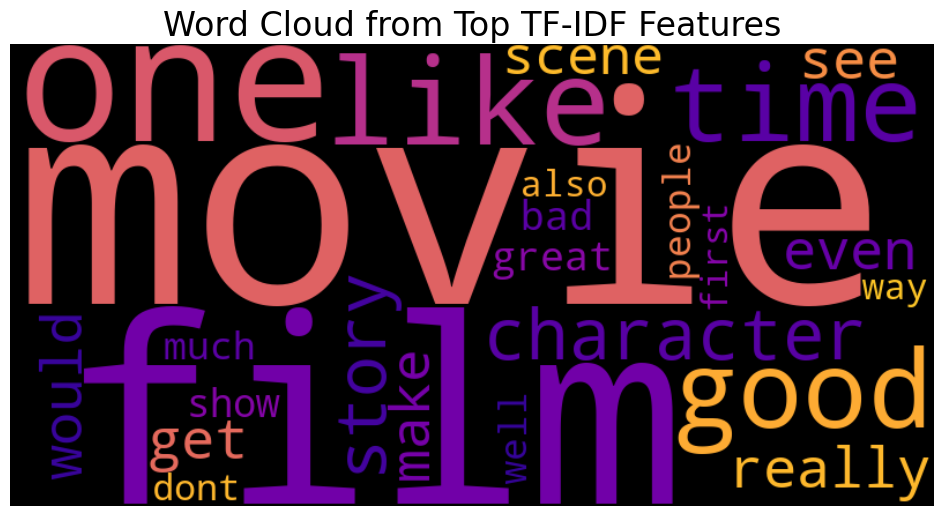

In [17]:
top_n = 25
top_features = tfidf_df.sum(axis=0).nlargest(top_n)
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='plasma',
    contour_color='white',
    contour_width=1,
    random_state=42,
    prefer_horizontal=0.9,
    normalize_plurals=True,
).generate_from_frequencies(top_features)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from Top TF-IDF Features', fontsize=24, color='Black')
plt.show()

In [18]:
df.drop(columns=['review'], inplace=True)

In [19]:
X = df.drop(columns=['sentiment'])
y = df['sentiment']

In [20]:
X.shape, y.shape

((50000, 999), (50000,))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.83
